In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Import Data

In [3]:
!pwd

/Users/xiaoxi/Documents/self/cv/to_recruter/dhwanne/Endeavour_group/interview/EDG_test


In [7]:
data_train_raw = pd.read_csv("data/train.csv", parse_dates = ['contact_date'])
print(data_train_raw.shape)

(4000, 14)


## Data Exploration

1. no null value in all columns
2. cpi: The Consumer Price Index (CPI) is an index that is often used to measure inflation by tracking the changes over time in the prices paid by consumers for a basket of goods and services. 

In [11]:
data_train.head(4)


,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
0,41020,41-60,white-collar,divorced,bachelors,yes,no,283,3,1,success,2018-07-09,92.379,1
1,23720,60+,other,divorced,secondary,no,yes,169,6,2,success,2018-05-07,94.215,1
2,29378,41-60,white-collar,married,bachelors,no,no,552,999,0,nonexistent,2018-01-08,93.444,1
3,36636,25-40,technician,single,senior_secondary,yes,yes,206,999,0,nonexistent,2018-02-11,93.200,0


In [9]:
data_train = data_train_raw.copy()
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   client_id             4000 non-null   int64         
 1   age_bracket           4000 non-null   object        
 2   job                   4000 non-null   object        
 3   marital               4000 non-null   object        
 4   education             4000 non-null   object        
 5   has_housing_loan      4000 non-null   object        
 6   has_personal_loan     4000 non-null   object        
 7   prev_call_duration    4000 non-null   int64         
 8   days_since_last_call  4000 non-null   int64         
 9   num_contacts_prev     4000 non-null   int64         
 10  poutcome              4000 non-null   object        
 11  contact_date          4000 non-null   datetime64[ns]
 12  cpi                   4000 non-null   float64       
 13  subs_deposit      

In [10]:
data_train.describe()

,client_id,prev_call_duration,days_since_last_call,num_contacts_prev,cpi,subs_deposit
count,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,22430.64275,3871.142250,903.150750,0.272000,107.348378,0.397500
std,12052.91754,26080.549053,293.323535,0.643132,107.885469,0.489442
min,17.00000,2.000000,0.000000,0.000000,92.201000,0.000000
25%,12408.25000,131.000000,999.000000,0.000000,92.963000,0.000000
50%,23336.50000,237.000000,999.000000,0.000000,93.444000,0.000000
75%,32990.00000,461.000000,999.000000,0.000000,93.994000,1.000000
max,41186.00000,419900.000000,999.000000,6.000000,947.670000,1.000000


#### check histogram

In [50]:
def hist_plot_data(df_input, col_check):
    groupby_col = ["subs_deposit", col_check]
    df = data_train.groupby(groupby_col).agg({"client_id": "nunique"}).reset_index()
    df_plot=pd.pivot_table(df, index=[col_check], columns=["subs_deposit"], fill_value=0)
    
    return df_plot

    

In [59]:
data_train.groupby("subs_deposit").agg({"client_id": "nunique"}).reset_index()

,subs_deposit,client_id
0,0,2410
1,1,1590


<AxesSubplot:xlabel='subs_deposit', ylabel='Count'>

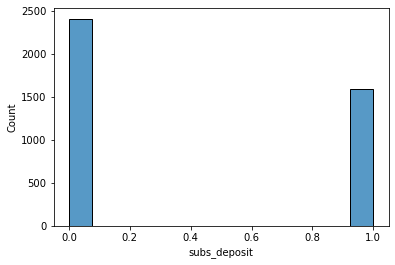

In [62]:
sns.histplot(data=data_train, x="subs_deposit")

client_id     
subs_deposit         0    1
age_bracket                
18-24               56   92
25-40             1317  844
41-60             1007  537
60+                 30  117

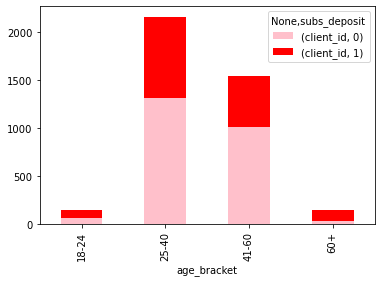

In [61]:
df_age_bucket = hist_plot_data(data_train,"age_bracket")
df_age_bucket.plot(kind='bar', stacked=True, color=['pink', 'red'])
df_age_bucket

client_id     
subs_deposit          0    1
job                         
blue-collar         556  213
entrepreneur         82   32
other               203  300
pink-collar         293  162
self-employed        98   55
technician          404  236
white-collar        774  592

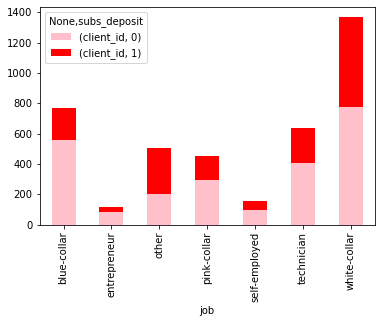

In [54]:
df_job = hist_plot_data(data_train,"job")
df_job.plot(kind='bar', stacked=True, color=['pink', 'red'])
df_job

client_id     
subs_deposit         0    1
marital                    
divorced           268  174
married           1506  868
single             632  544
unknown              4    4

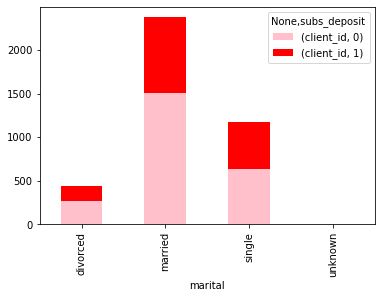

In [55]:
df_marital = hist_plot_data(data_train,"marital")
df_marital.plot(kind='bar', stacked=True, color=['pink', 'red'])
df_marital

client_id     
subs_deposit             0    1
has_housing_loan               
no                    1102  691
unknown                 61   31
yes                   1247  868

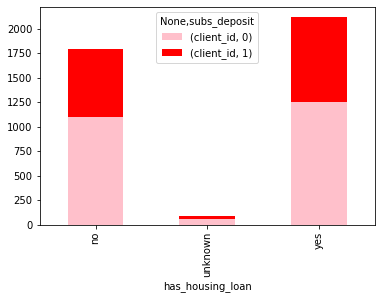

In [56]:

df_has_housing_loan = hist_plot_data(data_train,"has_housing_loan")
df_has_housing_loan.plot(kind='bar', stacked=True, color=['pink', 'red'])
df_has_housing_loan

client_id     
subs_deposit             0    1
education                      
bachelors              699  575
illiterate               1    3
masters                323  201
secondary              756  358
senior_secondary       537  371
unknown                 94   82

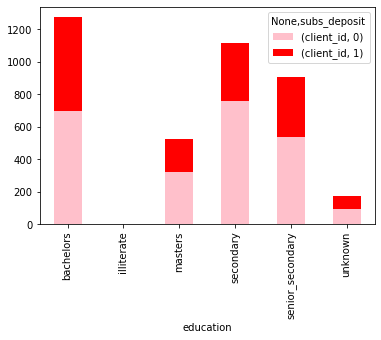

In [57]:
df_education = hist_plot_data(data_train,"education")
df_education.plot(kind='bar', stacked=True, color=['pink', 'red'])
df_education

client_id      
subs_deposit              0     1
num_contacts_prev                
0                      2136  1083
1                       233   334
2                        33   111
3                         5    49
4                         2     8
5                         1     4
6                         0     1

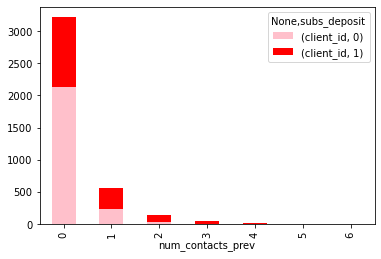

In [58]:
df_num_contacts_prev = hist_plot_data(data_train,"num_contacts_prev")
df_num_contacts_prev.plot(kind='bar', stacked=True, color=['pink', 'red'])
df_num_contacts_prev

In [207]:
df_num_contacts_prev["perct"]= df_num_contacts_prev.iloc[:,1]/(df_num_contacts_prev.iloc[:,0]+df_num_contacts_prev.iloc[:,1]) * 100

df_num_contacts_prev


client_id             perct
subs_deposit              0     1            
num_contacts_prev                            
0                      2136  1083   33.643989
1                       233   334   58.906526
2                        33   111   77.083333
3                         5    49   90.740741
4                         2     8   80.000000
5                         1     4   80.000000
6                         0     1  100.000000

client_id      
subs_deposit         0     1
poutcome                    
failure            227   192
nonexistent       2136  1083
success             47   315

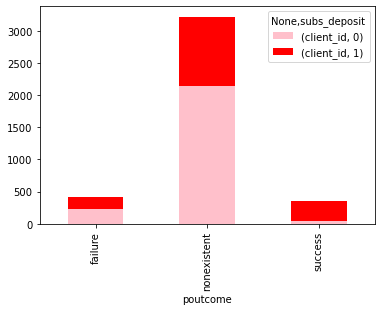

In [68]:
df_poutcome = hist_plot_data(data_train,"poutcome")
df_poutcome.plot(kind='bar', stacked=True, color=['pink', 'red'])
df_poutcome

####  Explore: prev_call_duration
* potential feature engineering: create categorical var, [0-250] --> 0, [250-500] --> 1, [500, 500+] -->2
* 0, 1, 2 indicate the likelyhood of subs_deposit

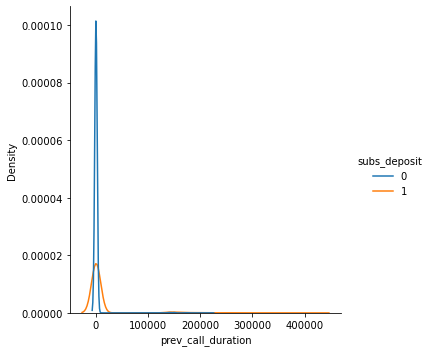

In [67]:
sns.displot(data=data_train, x="prev_call_duration", hue="subs_deposit", kind="kde")

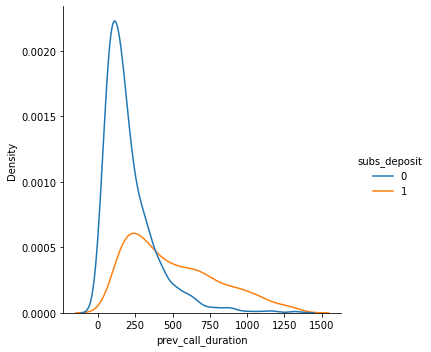

In [65]:
sns.displot(data=data_train[data_train.prev_call_duration<50000], x="prev_call_duration", hue="subs_deposit", kind="kde")

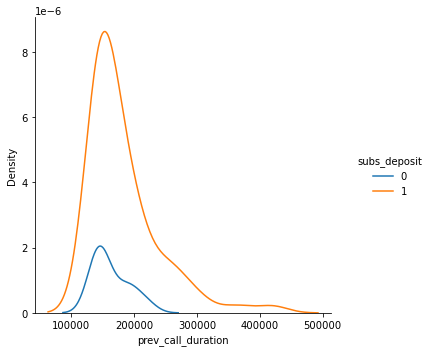

In [66]:
sns.displot(data=data_train[data_train.prev_call_duration>50000], x="prev_call_duration", hue="subs_deposit", kind="kde")

#### explore days_since_last_call
* potential feature enigneering: 999 --> 0, [0, 999) --> 1
* 0, 1 indicate the likelyhood of subs_deposit

In [88]:
perc_call_prev = data_train[data_train.days_since_last_call<999]["days_since_last_call"].count()/len(data_train)
print(f"{perc_call_prev*100}% of client being contacted before")

9.65% of client being contacted before


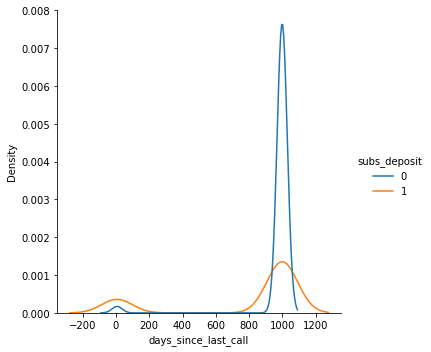

In [69]:
sns.displot(data=data_train, x="days_since_last_call", hue="subs_deposit", kind="kde")

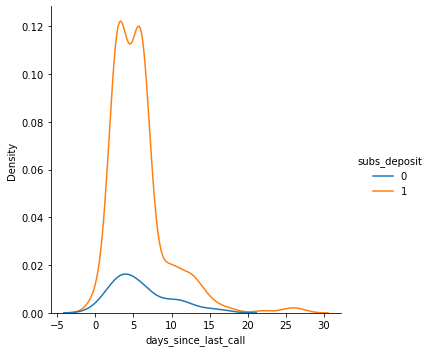

In [70]:
sns.displot(data=data_train[data_train.days_since_last_call<365], x="days_since_last_call", hue="subs_deposit", kind="kde")

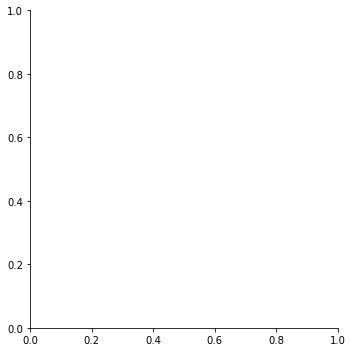

In [74]:
sns.displot(data=data_train[(data_train.days_since_last_call>365) & (data_train.days_since_last_call<999)], x="days_since_last_call", hue="subs_deposit", kind="kde")

####  Explore: CPI
* no significant correlation observed
* data quality issue, cpi > 900 ???
* not to use cpi in modelling


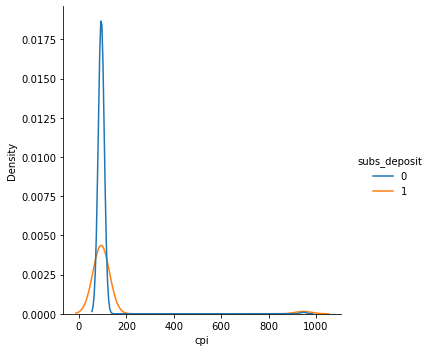

In [75]:
sns.displot(data=data_train, x="cpi", hue="subs_deposit", kind="kde")

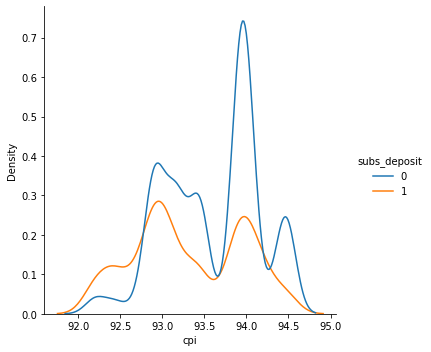

In [78]:
sns.displot(data=data_train[data_train.cpi<900], x="cpi", hue="subs_deposit", kind="kde")

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
33,33914,25-40,white-collar,single,bachelors,yes,no,324,999,0,nonexistent,2018-05-11,947.67,0
54,34721,41-60,pink-collar,divorced,bachelors,unknown,unknown,262,999,1,failure,2018-06-11,947.67,1
146,32685,25-40,white-collar,single,bachelors,yes,no,526,999,0,nonexistent,2018-01-10,946.01,1
174,32575,18-24,other,single,senior_secondary,no,yes,380,3,1,success,2018-05-10,946.01,1
259,35583,41-60,technician,married,bachelors,no,no,164,999,1,failure,2018-07-11,947.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,32557,25-40,other,single,unknown,yes,no,309,999,1,failure,2018-05-10,946.01,0
3830,32704,18-24,other,single,senior_secondary,yes,no,226,999,1,failure,2018-01-10,946.01,1
3949,32955,25-40,technician,single,bachelors,no,no,649,999,0,nonexistent,2018-03-10,946.01,1
3958,32840,25-40,blue-collar,single,senior_secondary,no,no,253,999,2,failure,2018-02-10,946.01,1


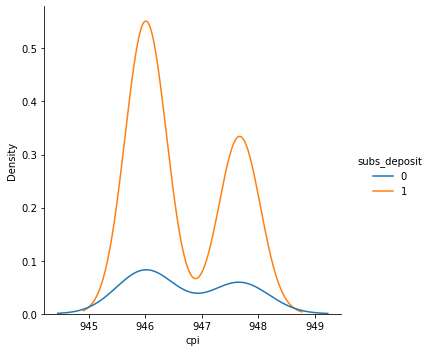

In [81]:
sns.displot(data=data_train[data_train.cpi>900], x="cpi", hue="subs_deposit", kind="kde")

data_train[data_train.cpi>900]

## to-do:
* explore contact_date
* understand whether certain date of week impact results

## Feature Engineering + Preprocessing
1. days_since_last_call
* potential feature enigneering: 999 --> 0, [0, 999) --> 1
* 0, 1 indicate the likelyhood of subs_deposit

2. prev_call_duration
* potential feature engineering: create categorical var, [0-250) --> 0, [250-500) --> 1, [500, 500+] -->2
* 0, 1, 2 indicate the likelyhood of subs_deposit


3. exclude cpi, contact_date from modelling

4. one-hot coding

In [180]:
def feature_engieering(df_input):
    
    
    df_output = df_input.copy()
    
    df_output["prev_contacted"] = [1 if x<999 else 0 for x in df_input.days_since_last_call]
    df_output["cate_call_duration"] = [0 if ((x>0) & (x<250)) else 1 if ((x>=250) & (x<500)) else 2 for x in df_input.prev_call_duration]
    
    df_output.drop(columns=["days_since_last_call", "prev_call_duration"], inplace=True)
    
    return df_output


def remove_col(df, col=["cpi","contact_date"], rm_id=True):
    
    df_output = df.copy()
    
    if rm_id:
        df_output.drop(columns=col+["client_id"], inplace=True)
    else:
        df_output.drop(columns=col, inplace=True)
    return df_output


def one_hot_coding(df):
    
    df_output = pd.get_dummies(df)    
    return df_output

In [126]:
df_train = feature_engieering(data_train_raw)

df_modelling_train_tmp = remove_col(df_train)

df_modelling_train = one_hot_coding(df_modelling_train_tmp)


df_modelling_train.columns

Index(['num_contacts_prev', 'subs_deposit', 'prev_contacted',
       'cate_call_duration', 'age_bracket_18-24', 'age_bracket_25-40',
       'age_bracket_41-60', 'age_bracket_60+', 'job_blue-collar',
       'job_entrepreneur', 'job_other', 'job_pink-collar', 'job_self-employed',
       'job_technician', 'job_white-collar', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_bachelors', 'education_illiterate', 'education_masters',
       'education_secondary', 'education_senior_secondary',
       'education_unknown', 'has_housing_loan_no', 'has_housing_loan_unknown',
       'has_housing_loan_yes', 'has_personal_loan_no',
       'has_personal_loan_unknown', 'has_personal_loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [127]:
df_modelling_train.head(3)

,num_contacts_prev,subs_deposit,prev_contacted,cate_call_duration,age_bracket_18-24,age_bracket_25-40,age_bracket_41-60,age_bracket_60+,job_blue-collar,job_entrepreneur,...,education_unknown,has_housing_loan_no,has_housing_loan_unknown,has_housing_loan_yes,has_personal_loan_no,has_personal_loan_unknown,has_personal_loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1,1,1,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,2,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,1,0,2,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


## Modelling

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from mlflow.models.signature import infer_signature
from sklearn.metrics import f1_score
from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK
from hyperopt.pyll import scope
import warnings

### setup mlflow to track hyperparam

In [161]:
import mlflow
from mlflow.tracking.client import MlflowClient

tracking_uri = "http://127.0.0.1:5001/"

mlflow.set_tracking_uri(tracking_uri)
client = MlflowClient(tracking_uri=tracking_uri) 

In [162]:
def find_or_create_experiment_id(experiment_name):
    """
    experiment_name is string
    
    create experiemnt id and output id if not exists, else output id
    
    output is string
    """
    experiment = mlflow.get_experiment_by_name(experiment_name)
    if experiment is None:
        experiment_id = mlflow.create_experiment(experiment_name)
    else:
        experiment_id = dict(experiment)["experiment_id"]
    return experiment_id

### split train test data

In [163]:
x = df_modelling_train.drop(columns="subs_deposit")
y = df_modelling_train.subs_deposit

x_train,x_test,y_train,y_test= train_test_split(x,y,
                                                test_size=0.2, random_state=1)

### modelling - Random forest

In [169]:
experiment_name = "random foreset"
experiment_id = find_or_create_experiment_id(experiment_name)

In [ ]:
def hyper_opt_cv(model, X_train, y_train, kfold=5):    
    metrics = ('precision', 'recall',"roc_auc","f1",
                      "accuracy")
    scores = cross_validate(model, X=X_train, y=y_train, 
                            cv=kfold, n_jobs=-1,
                            scoring=metrics,
                            return_train_score=True)
    metrics_score = dict((x, scores[x].mean()) for x in scores.keys() 
                         if x not in ["fit_time","score_time"])  
    
    return metrics_score

In [166]:
def train_rf_model_cv(params):
    
    mlflow.sklearn.autolog(disable=True)
    with mlflow.start_run(experiment_id=experiment_id, nested=True):
        # log parameter
        mlflow.log_params(params)
        rf = RandomForestClassifier(**params,random_state=123)
        rf.fit(x_train, y_train)
        
        # log metrics
        dict_scores = hyper_opt_cv(rf, X_train=x_train, y_train=y_train)
        mlflow.log_metrics(dict_scores)
        
        train_f1_score = dict_scores["train_f1"]
        test_f1_score = dict_scores["test_f1"]
        train_test_f1_gap = abs(train_f1_score-test_f1_score)
        mlflow.log_metric("f1_gap",train_test_f1_gap)
        

         # Set the loss to -1*f1_score so fmin maximizes the auc_score
        return {'status': STATUS_OK, 'loss': train_test_f1_gap}

In [167]:
search_space_rf = {
    "n_estimators": scope.int(hp.quniform('n_estimators', 100, 500, 1)),
    "max_depth": scope.int(hp.quniform('max_depth', 2, 10, 1)),
    'criterion':hp.choice('criterion',['gini','entropy'])
}

run_name_rf = "tuning rf"

In [168]:
warnings.filterwarnings(action='ignore')

trials = Trials()
with mlflow.start_run(experiment_id=experiment_id,
                      run_name=run_name_rf):
    best_params = fmin(
        fn=train_rf_model_cv,
        space=search_space_rf, 
        algo=tpe.suggest, 
        max_evals=30,
        trials = trials,
    )

100%|████████| 30/30 [00:42<00:00,  1.43s/trial, best loss: 0.0018121064608538906]


#### best hyper param
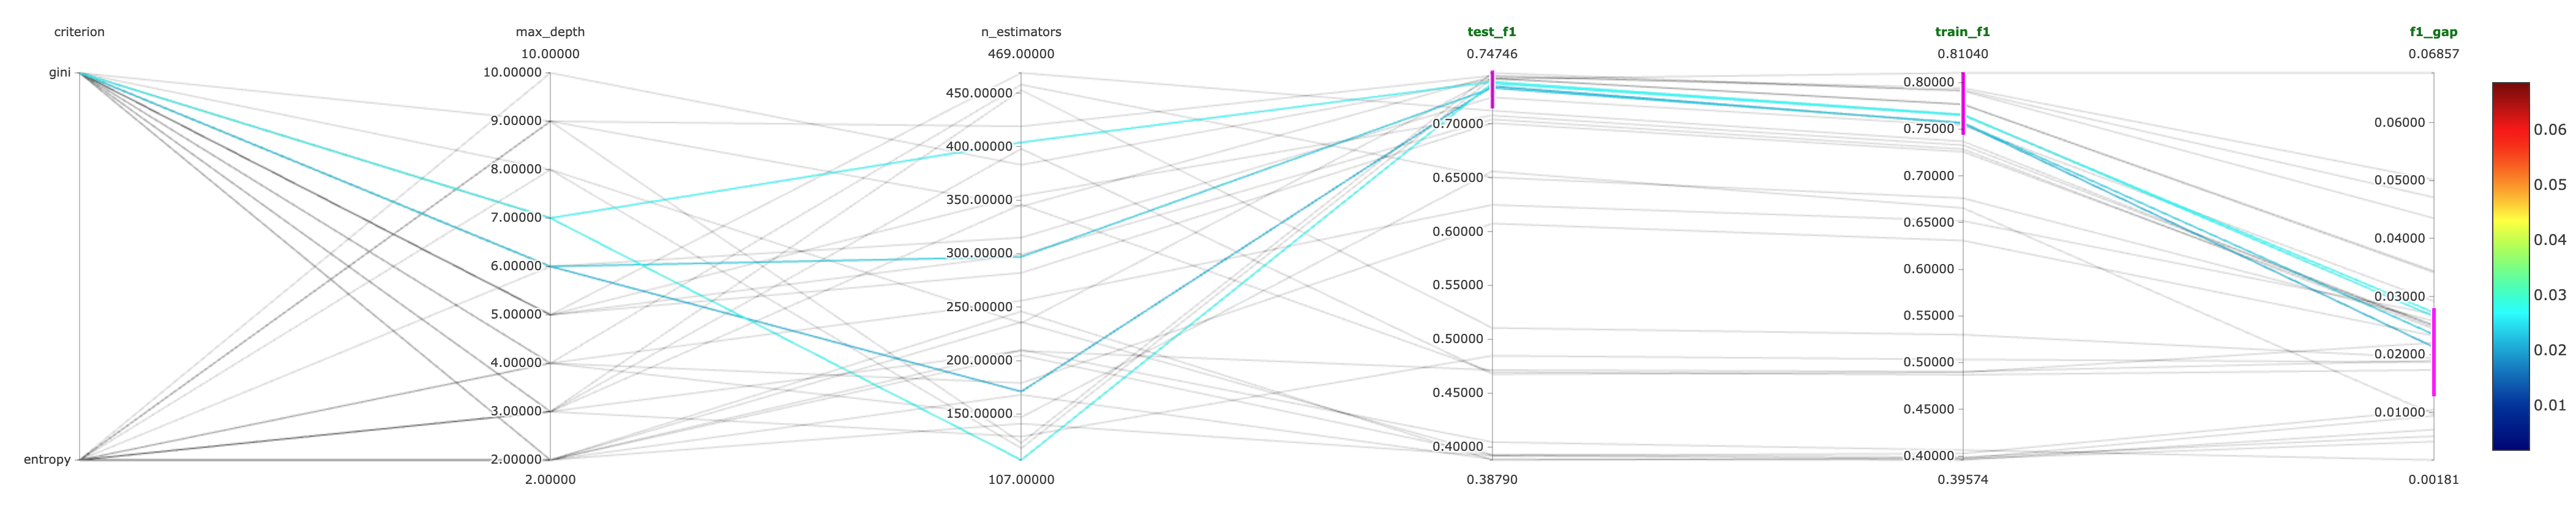

In [170]:
search_space_rf_best = {
    "n_estimators": 107,
    "max_depth": 7,
    'criterion':'gini',
}

run_name = "best rf"

In [182]:
def train_rf_model_best_fit(params, run_name):
    
    mlflow.sklearn.autolog(disable=True)
    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name,
                          nested=False):
        # log parameter
        mlflow.log_params(params)
        rf = RandomForestClassifier(**params,random_state=123)
        rf.fit(x_train, y_train)
        
        # log metrics
        dict_scores = hyper_opt_cv(rf, X_train=x_train, y_train=y_train)
        mlflow.log_metrics(dict_scores)
        
        train_f1_score = dict_scores["train_f1"]
        test_f1_score = dict_scores["test_f1"]
        train_test_f1_gap = abs(train_f1_score-test_f1_score)
        mlflow.log_metric("f1_gap",train_test_f1_gap)
        
        signature = infer_signature(x_train, y_train)
        mlflow.sklearn.log_model(rf, "model", signature=signature)
        
        # predict
        y_train_predict=rf.predict(x_train)
        
        # predict
        y_predict=rf.predict(x_test)
        
        
        return dict_scores, rf, y_predict, y_train_predict
    
    
_, rf_model_best, y_predict, y_train_predict = train_rf_model_best_fit(search_space_rf_best, 
                                                                run_name_rf)



In [177]:
f1_score(y_train, y_train_predict)

0.7606112054329371

In [174]:
forest_importances = pd.Series(rf_model_best.feature_importances_, 
                               index=x_train.columns).sort_values(ascending=False)

In [200]:
# Implication: whether a client has been contacted before and duration of the conversation matter a lot
forest_importances.head(20) 

cate_call_duration            0.457498
prev_contacted                0.116598
poutcome_success              0.097365
num_contacts_prev             0.048130
poutcome_nonexistent          0.039622
job_other                     0.034944
age_bracket_60+               0.026460
education_secondary           0.015636
age_bracket_41-60             0.013714
education_bachelors           0.012569
poutcome_failure              0.012311
age_bracket_25-40             0.011258
job_blue-collar               0.011163
marital_married               0.011117
marital_single                0.010209
has_housing_loan_no           0.006943
age_bracket_18-24             0.006656
has_personal_loan_no          0.006455
education_senior_secondary    0.006147
job_white-collar              0.006134
dtype: float64

## Prediction

In [178]:
data_test_raw = pd.read_csv("data/test.csv", parse_dates = ['contact_date'])
print(data_test_raw.shape)

(1000, 13)


### Load and process test data

In [192]:
df_test = feature_engieering(data_test_raw)

df_modelling_test_tmp = remove_col(df_test, rm_id=False)

df_modelling_test = one_hot_coding(df_modelling_test_tmp)


df_modelling_test.columns

Index(['client_id', 'num_contacts_prev', 'prev_contacted',
       'cate_call_duration', 'age_bracket_18-24', 'age_bracket_25-40',
       'age_bracket_41-60', 'age_bracket_60+', 'job_blue-collar',
       'job_entrepreneur', 'job_other', 'job_pink-collar', 'job_self-employed',
       'job_technician', 'job_white-collar', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_bachelors', 'education_illiterate', 'education_masters',
       'education_secondary', 'education_senior_secondary',
       'education_unknown', 'has_housing_loan_no', 'has_housing_loan_unknown',
       'has_housing_loan_yes', 'has_personal_loan_no',
       'has_personal_loan_unknown', 'has_personal_loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

### Prediction and save output 

In [193]:
df_modelling_test["subs_deposit"] = df_modelling_test.drop(columns=["client_id"]).apply(lambda x: rf_model_best.predict([x])[0], axis=1)

In [196]:
df_modelling_test[["client_id", "subs_deposit"]].to_csv("data/submissions.csv", index=False)

## Shapely Value

In [208]:
import shap

In [209]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf_model_best)
shap_values = explainer.shap_values(x_train)

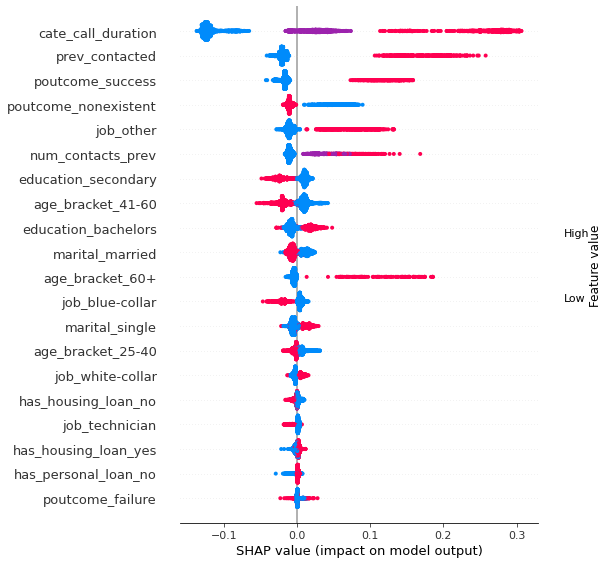

In [211]:
shap.summary_plot(shap_values[1], x_train)